# Data Preparation Basics
## Part 2 - Treating missing values

In [ ]:
import numpy as np
import pandas as pd

### Figuring out what data is missing

In [ ]:
# NaN is short for Not a number. It is used to represent entries that are undefined. It is also used for representing missing values in a dataset
missing = np.nan

series_obj = pd.Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
print(series_obj)

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object


In [ ]:
# Test if there are any null values
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

### Filling in for missing values

In [ ]:
# Produce random values and shape the result in 6x6 matrix
np.random.seed(25)
DF_obj = pd.DataFrame(np.random.rand(36).reshape(6, 6))
print(DF_obj)

          0         1         2         3         4         5
0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
1  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
2  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
3  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
4  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
5  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819


In [ ]:
# Add missing data
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
# Fill out missing data with zeros
filled_DF = DF_obj.fillna(0)
filled_DF
# Fill the missing values with 0.5 instead of 0
# Fil out missing data in column 0
#filled_DF = DF_obj[5].fillna(0)
#filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
# Fill out missing data in column 0 with 0.1 and column 5 with 1.25
filled_DF = DF_obj.fillna({0: 0.1, 5:1.25})
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
# Fill out missing data with forward fill method
fill_DF = DF_obj.fillna(method='ffill')
fill_DF
# Try replace it with backward fill (bfill) and compare the answer

### Counting missing values

In [ ]:
np.random.seed(25)
DF_obj = pd.DataFrame(np.random.rand(36).reshape(6,6))
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [ ]:
# Counting missing data
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

### Filtering out missing values

In [ ]:
# Drop all the raws with missing values
DF_no_NaN = DF_obj.dropna()
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [ ]:
# Drop all the column with missing values
DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

# Find out what axis=1 means?

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


Tasks 1:

Create a pandas DataFrame named sales_data with the following data:

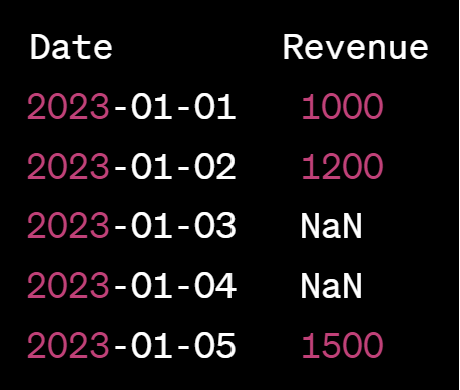


In [ ]:
import pandas as pd
import numpy as np
missing = np.nan
data  = {
    "Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    "Revenue": [1000, 1200 , missing, missing, 1500]
}

df = pd.DataFrame(data)
df

,Date,Revenue
0,2023-01-01,1000.0
1,2023-01-02,1200.0
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,1500.0


Task 2:
Fill in the missing values (NaN) in the 'Revenue' column with the value 800.

In [ ]:
filled_DF = 